In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../NCE/")
from lib import *
import scipy
import torchvision

Based on https://stackoverflow.com/questions/31528800/how-to-implement-zca-whitening-python

In [9]:
def show_image(img):
    plt.figure(figsize=(4,4));
    plt.imshow(img, cmap="gray");
    plt.axis("off");

In [10]:
train_tfms = get_transforms()

In [11]:
ds = torchvision.datasets.CIFAR10(root = "../data/", 
                                  train = True, 
                                  transform  = train_tfms, 
                                  target_transform = None, 
                                  download = False)

In [12]:
idx = 200

In [13]:
example = np.array(ds[idx][0])

In [14]:
example.shape

(784,)

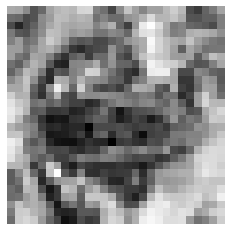

In [15]:
show_image(example.reshape(28,28))

In [32]:
np.mean(example)

0.43549922

In [16]:
mean, _ = get_stats(ds)

In [21]:
lambda_ = np.load("../NCE/NCE_results/precision_matrix_mask.npy")

In [22]:
lambda_.shape

(784, 784)

In [23]:
epsilon = 1e-5

In [24]:
covariance_matrix = np.linalg.inv(lambda_)

In [25]:
U,S,V = np.linalg.svd(covariance_matrix)

In [26]:
zca = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S + epsilon)), U.T))

In [27]:
whitened = zca @ (example - mean)

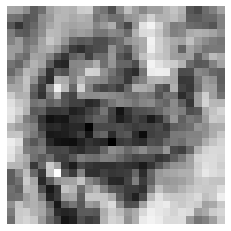

In [28]:
show_image(whitened.reshape(28,28))

In [29]:
zca.shape

(784, 784)

In [30]:
np.var(whitened)

0.5988501371118977